<a href="https://colab.research.google.com/github/athai16/codepath-prework/blob/main/Copy_of_lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 4

## Outline

Repeat exercises from Lab 2, but with the *X SuperBowl* social media dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [19]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the X SuperBowl dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe
- Make sure you watch for line breaks and emojis that might cause problems with the data import

In [20]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/x_superbowl.csv')

print (df)

Mounted at /content/gdrive
      Unnamed: 0                       _id                      created_at  \
0              0  6020fc7e9e1aa8e3e7ad0832  Mon Feb 08 04:29:58 +0000 2021   
1              1  6020fc7e9e1aa8e3e7ad0833  Mon Feb 08 04:29:55 +0000 2021   
2              2  6020fc7e9e1aa8e3e7ad0834  Mon Feb 08 04:29:48 +0000 2021   
3              3  6020fc7e9e1aa8e3e7ad0835  Mon Feb 08 04:29:43 +0000 2021   
4              4  6020fc7e9e1aa8e3e7ad0836  Mon Feb 08 04:29:42 +0000 2021   
...          ...                       ...                             ...   
9751           3  6020fbb89e1aa8e3e7ac0a78  Mon Feb 08 02:01:58 +0000 2021   
9752           4  6020fbb89e1aa8e3e7ac0a79  Mon Feb 08 01:00:24 +0000 2021   
9753           5  6020fbb89e1aa8e3e7ac0a7a  Sun Feb 07 23:44:20 +0000 2021   
9754           6  6020fbb89e1aa8e3e7ac0a7b  Sun Feb 07 23:33:40 +0000 2021   
9755           7  6020fbb89e1aa8e3e7ac0a7c  Sun Feb 07 23:32:32 +0000 2021   

                id               id_

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as user_mentioned, from strings into numbers
- Reduce the variables in your dataframe to only those that have useful data
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [21]:
#drop irrelevant columns
irrelevant_columns = ['truncated','filter_level','possibly_sensitive','display_text_range','in_reply_to_status_id','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_status_id_str','in_reply_to_screen_name','coordinates']
df_cleaned = df.drop(columns=irrelevant_columns)

#clean text data by converting text to lowercase
df_cleaned['text'] = df_cleaned['text'].apply(lambda x: x.lower())

#handle duplicates
df_cleaned = df_cleaned.drop_duplicates()

#save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

print (df_cleaned)


      Unnamed: 0                       _id                      created_at  \
0              0  6020fc7e9e1aa8e3e7ad0832  Mon Feb 08 04:29:58 +0000 2021   
1              1  6020fc7e9e1aa8e3e7ad0833  Mon Feb 08 04:29:55 +0000 2021   
2              2  6020fc7e9e1aa8e3e7ad0834  Mon Feb 08 04:29:48 +0000 2021   
3              3  6020fc7e9e1aa8e3e7ad0835  Mon Feb 08 04:29:43 +0000 2021   
4              4  6020fc7e9e1aa8e3e7ad0836  Mon Feb 08 04:29:42 +0000 2021   
...          ...                       ...                             ...   
9751           3  6020fbb89e1aa8e3e7ac0a78  Mon Feb 08 02:01:58 +0000 2021   
9752           4  6020fbb89e1aa8e3e7ac0a79  Mon Feb 08 01:00:24 +0000 2021   
9753           5  6020fbb89e1aa8e3e7ac0a7a  Sun Feb 07 23:44:20 +0000 2021   
9754           6  6020fbb89e1aa8e3e7ac0a7b  Sun Feb 07 23:33:40 +0000 2021   
9755           7  6020fbb89e1aa8e3e7ac0a7c  Sun Feb 07 23:32:32 +0000 2021   

                id               id_str  \
0     1.358630e+18  

## Summarize Data

➡️ Assignment Tasks
- Create at least two charts to summarize and visualize the data
- Examples include: Number of posts per device; top 10 posts with highest engagement

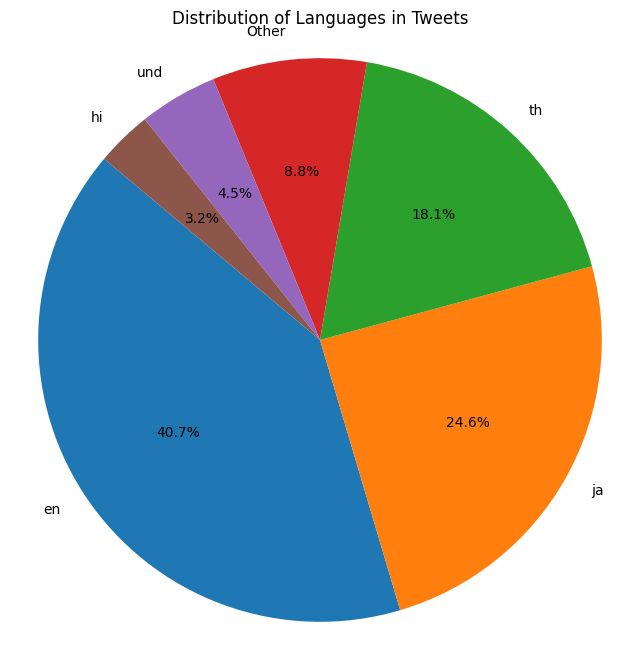

In [22]:
#chart 1
#pie chart that shows the different languages used in tweets

import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame
df = pd.DataFrame(df)

# Function to categorize languages
def categorize_language(lang):
    if lang in ['hi', 'und', 'th', 'ja', 'en']:
        return lang
    else:
        return 'Other'

# Apply categorization function to the 'lang' column
df['lang'] = df['lang'].apply(categorize_language)

# Count the number of tweets for each language category
language_counts = df['lang'].value_counts()

# Create labels and sizes for the pie chart
labels = language_counts.index
sizes = language_counts.values

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Distribution of Languages in Tweets')

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


<ipython-input-23-6fc439d2bff7>:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


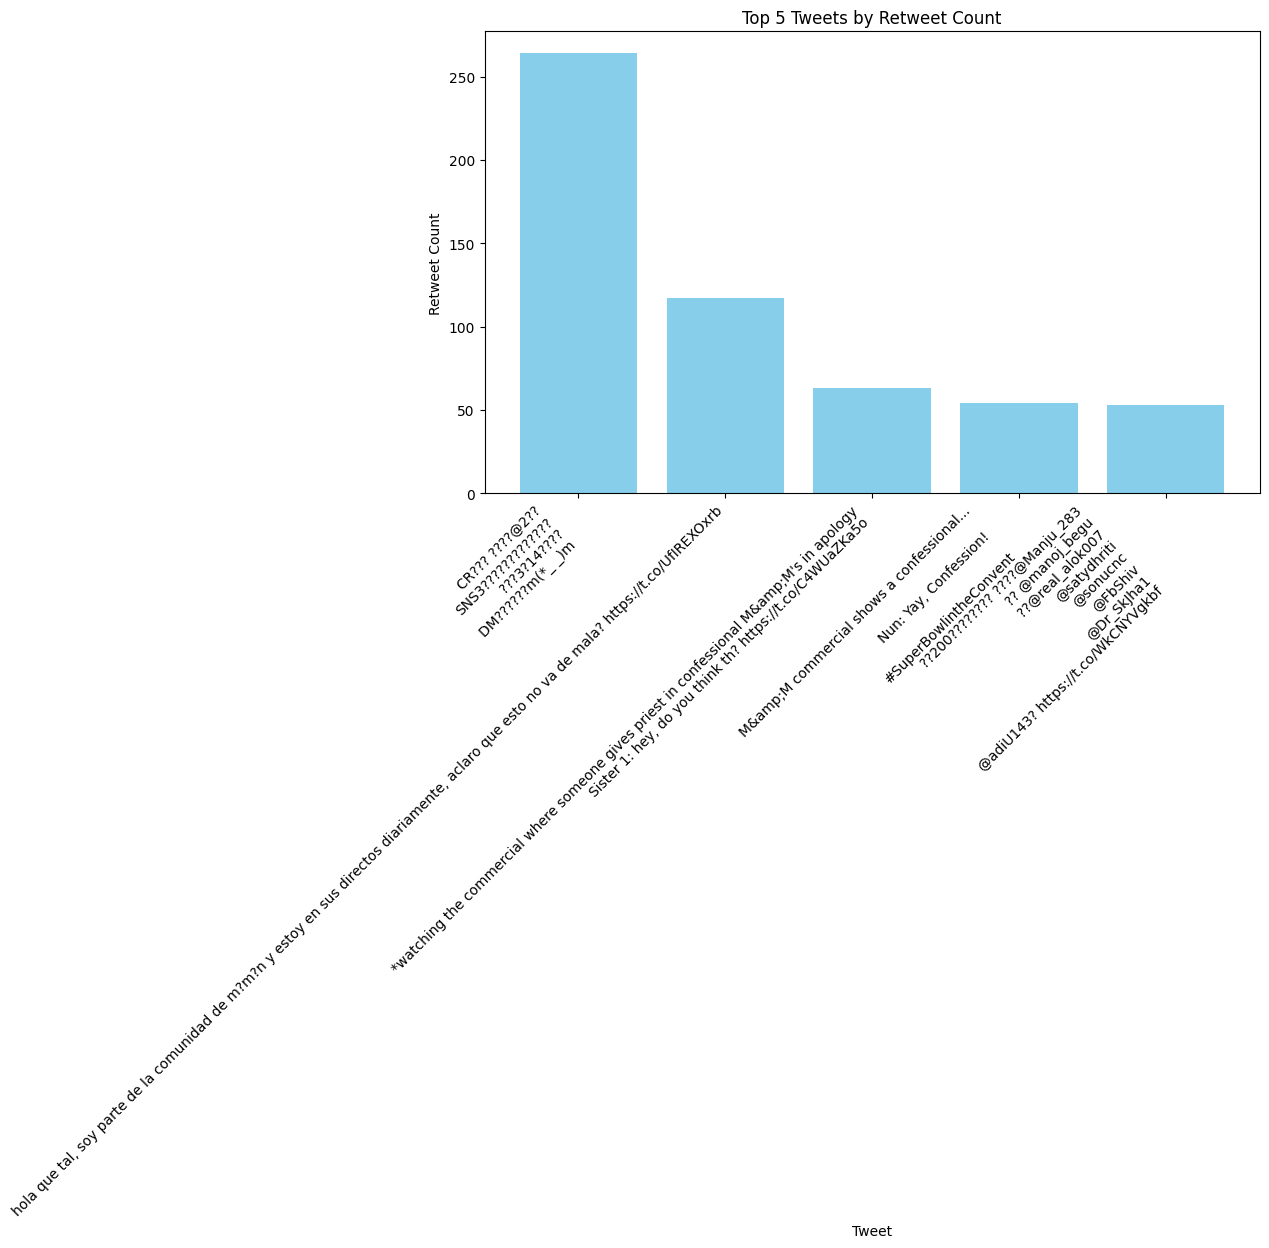

In [23]:
#chart 2
# bar chart showing the top 5 tweets with the most retweet counts

import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame
df = pd.DataFrame(df)

# Sort the DataFrame based on 'retweet_count' in descending order
df_sorted = df.sort_values(by='retweet_count', ascending=False)

# Select the top 5 tweets with the highest retweet counts
top_5_tweets = df_sorted.head(5)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_tweets['text'], top_5_tweets['retweet_count'], color='skyblue')

# Add labels and title
plt.xlabel('Tweet')
plt.ylabel('Retweet Count')
plt.title('Top 5 Tweets by Retweet Count')

# Display the chart
plt.xticks(rotation=45, ha='right')  # Rotate tweet labels for better readability
plt.tight_layout()
plt.show()
